# Guide to Train Machine Learning Model for CheckCorona Applications.


## Import all the libraries 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.preprocessing import image
print('All libs are imported')

All libs are imported


Using TensorFlow backend.


## Point toward the train,valid and test training datasets

In [2]:
TRAINING_DIR ="./train/"
VALIDATION_DIR ='./valid/'
TESTING_DIR ='./test/'

## We will use ImageDataGenerator from Keras for Preprocessing our datasets

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255.0 , 
    )
valid_datagen=ImageDataGenerator(
    rescale=1/255.0 ,
)

test_datagen=ImageDataGenerator(
    rescale=1/255.0
)

#INSTANTIATE DATAGEN'S
train_flow = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(416,416)
    )
valid_flow=valid_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(416,416)
    )
test_flow=test_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size=1,
    class_mode='binary',
    target_size=(416,416)
    )


Found 5275 images belonging to 2 classes.
Found 588 images belonging to 2 classes.
Found 589 images belonging to 2 classes.


## This is for stopping model to train after we achieve 98% accuracy

In [4]:
ACCURACY_THRESHOLD = 0.98
class MyCallbacks (tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('acc') >= ACCURACY_THRESHOLD :
            print('Training is stopped !!! \n {} Accuracy reached !'.format(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
callbacks = MyCallbacks()

## Here is our Model !
### Power of CNN

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu',input_shape=(416,416,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
print(model.summary())
#we are using 'adam' optimizer and 'catagorical_entropy' loss 
model.compile( optimizer='adam' , loss ="binary_crossentropy" , metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 414, 414, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 207, 207, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 205, 205, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        1

## Train for 30 epoches , but you can train for more

In [6]:
EPOCHES = 30
history=model.fit(
              train_flow,
              epochs=EPOCHES,
              validation_data=valid_flow,
              callbacks=[callbacks]
             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 165 steps, validate for 19 steps
Epoch 1/30
165/165 [==============================] - 57s 345ms/step - loss: 0.6165 - acc: 0.6720 - val_loss: 0.5655 - val_acc: 0.6973
Epoch 2/30
165/165 [==============================] - 25s 153ms/step - loss: 0.5250 - acc: 0.7325 - val_loss: 0.4946 - val_acc: 0.7738
Epoch 3/30
165/165 [==============================] - 25s 155ms/step - loss: 0.4775 - acc: 0.7723 - val_loss: 0.4339 - val_acc: 0.7993
Epoch 4/30
165/165 [==============================] - 25s 154ms/step - loss: 0.4602 - acc: 0.7791 - val_loss: 0.4236 - val_acc: 0.7993
Epoch 5/30
165/165 [==============================] - 26s 158ms/step - loss: 0.4438 - acc: 0.7860 - val_loss: 0.4160 - val_acc: 0.8078
Epoch 6/30
165/165 [==============================] - 24s 148ms/step - loss: 0.4223 - acc: 0.8027 - val_loss: 0.4230 - val_acc: 0.8010
Epoch 7/30
165/165 [==============================] - 24s 148ms/step - loss: 0.4069 - acc: 0.8066

## Lets get insights from our training > How it went !

Text(0.5, 1.0, 'Training and validation loss')

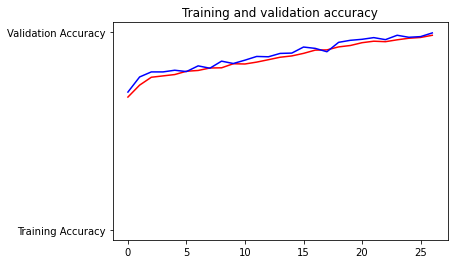

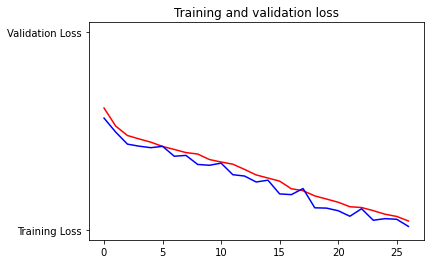

In [7]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [8]:
model.evaluate(test_flow)

  ...
    to  
  ['...']
589/589 [==============================] - 6s 10ms/step - loss: 1.6175 - acc: 0.7793


[1.6174776688794787, 0.7792869]

In [9]:
export_dir = './saved_model/1/'
tf.saved_model.save(model,export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./saved_model/1/assets


In [10]:
import pathlib
tflite_model_file = pathlib.Path('./saved_model.tflite')
tflite_model_file.write_bytes(tflite_model)

2533308

In [14]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [12]:
labels = train_flow.class_indices.keys()
labels =list(labels)
#labels.txt is created 
filename = 'labels.txt'
with open(filename,"w") as f :
    f.writelines(labels[0]+str("\n"))
    f.writelines(labels[1]+str("\n"))
    

In [13]:


interpreter = tf.lite.Interpreter(model_path="./saved_model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 416 416   3] <class 'numpy.float32'>

1 output(s):
[1 1] <class 'numpy.float32'>


In [15]:
# 
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="./saved_model.tflite")
interpreter.allocate_tensors()
inputs = interpreter.get_input_details()
outputs = interpreter.get_output_details()


In [16]:
print(inputs)

[{'name': 'conv2d_input', 'index': 31, 'shape': array([  1, 416, 416,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [17]:
print(outputs)

[{'name': 'Identity', 'index': 0, 'shape': array([1, 1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [18]:
pred = model.evaluate(test_flow)
pred

  ...
    to  
  ['...']
589/589 [==============================] - 7s 11ms/step - loss: 1.6175 - acc: 0.7793


[1.6174776688794787, 0.7792869]

In [19]:
pred = model.predict(test_flow)
pred

array([[6.66179582e-02],
       [1.96387712e-03],
       [3.88601944e-02],
       [1.00000000e+00],
       [9.94728863e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.49433763e-04],
       [9.99999285e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.66459167e-01],
       [9.99980688e-01],
       [1.26917260e-02],
       [1.09194331e-02],
       [2.90576249e-01],
       [9.99996662e-01],
       [9.76937171e-03],
       [9.99880433e-01],
       [9.99999881e-01],
       [9.99792993e-01],
       [1.00000000e+00],
       [2.69249361e-03],
       [9.99950528e-01],
       [9.99990582e-01],
       [5.26591297e-03],
       [9.99999881e-01],
       [9.88622367e-01],
       [1.60546497e-01],
       [1.00000000e+00],
       [9.99479353e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.10761684e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.72080018e-03],
       [9.98664737e-01],


In [31]:
filenames = test_flow.filenames
labels = test_flow.labels 
print(filenames[:10])
print(labels[:10])
print((pred[:10]))

['healthy\\003d8fa0-6bf1-40ed-b54c-ac657f8495c5_jpg.rf.ec46024435074fe853a2d5ac4388863e.jpg', 'healthy\\01be3fe5-4a91-4c57-9af6-305966a7d0aa_jpg.rf.655c115083b39539f1d9990acc37273f.jpg', 'healthy\\01ef1712-90a6-4946-ad86-fc76b0cf2d3b_jpg.rf.ce8a08d18b0d40426df1a3b4b5b56059.jpg', 'healthy\\01f11e57-5c11-4ab0-9312-d88c3826721c_jpg.rf.ecc941a9661d03f3692ff7083ca99268.jpg', 'healthy\\03f43232-8362-4a4b-8632-aa336ce7ac08_jpg.rf.825e6e08a802806c91df14a33fe160f5.jpg', 'healthy\\04c17986-8a5d-446f-a3ec-46ace41aeca8_jpg.rf.53d10b5b9e3291ed397edf650c298b98.jpg', 'healthy\\05f6eacc-e1a9-4b88-a0ec-f4ab5ba72e93_jpg.rf.f7f295f7505944399b38234cad1b94c1.jpg', 'healthy\\05fa458a-9e6a-4e02-b85c-c8d67c3161cf_jpg.rf.671c3cf3f2c10ebf5b6e73489467952e.jpg', 'healthy\\0a461c5f-08e6-4c86-9ecd-5246e613f8c2_jpg.rf.3f94f7ecbe53b4142c1a8ba6236a4712.jpg', 'healthy\\0a50d5b7-436c-464e-aba4-4264cebb35be_jpg.rf.8e3190ba17d288236b44445343c52b4b.jpg']
[0 0 0 0 0 0 0 0 0 0]
[[6.6617958e-02]
 [1.9638771e-03]
 [3.8860194e-

In [38]:
import pandas as pd
threshold = 300
d = {
    "Filenames" : np.array(list(filenames[:threshold])) ,
    "Labels"    : list(labels[:threshold]),
    "pred"      : list(pred[:threshold] )
}
df = pd.DataFrame(d)
df.tail

<bound method NDFrame.tail of                                              Filenames  Labels            pred
0    healthy\003d8fa0-6bf1-40ed-b54c-ac657f8495c5_j...       0    [0.06661796]
1    healthy\01be3fe5-4a91-4c57-9af6-305966a7d0aa_j...       0  [0.0019638771]
2    healthy\01ef1712-90a6-4946-ad86-fc76b0cf2d3b_j...       0   [0.038860194]
3    healthy\01f11e57-5c11-4ab0-9312-d88c3826721c_j...       0           [1.0]
4    healthy\03f43232-8362-4a4b-8632-aa336ce7ac08_j...       0    [0.99472886]
..                                                 ...     ...             ...
295  unhealthy\1c7c7be7-497e-4751-89e4-09d4209a8e2a...       1           [1.0]
296  unhealthy\1caf25c0-c591-43a0-ab4d-4e6ecbfbb8cc...       1   [0.012155681]
297  unhealthy\1cc1ad56-7cf5-464c-994f-ff10d880ded9...       1           [1.0]
298  unhealthy\1ccf9c68-7db2-4170-b118-2b390c4bac7d...       1  [5.208293e-05]
299  unhealthy\1d0ba9aa-6e78-4642-8595-cdd07ffa7130...       1  [0.0005692551]

[300 rows x 3 columns